In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load datasets
symptoms_df = pd.read_csv("symtoms_df.csv")
severity_df = pd.read_csv("Symptom-severity.csv")
precautions_df = pd.read_csv("precautions_df.csv")
medications_df = pd.read_csv("medications.csv")
diets_df = pd.read_csv("diets.csv")
workout_df = pd.read_csv("workout_df.csv")
train_df = pd.read_csv("Training.csv")
description_df = pd.read_csv("description.csv")

print("Datasets loaded successfully ✅")
train_df.head()


Datasets loaded successfully ✅


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:
X = train_df.drop(columns=["prognosis"])
y = train_df["prognosis"]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


from sklearn.metrics import accuracy_score, classification_report

# Step 1: Model banaya
lr = LogisticRegression(max_iter=2000)   # max_iter bada rakha taaki converge ho jaye

# Step 2: Train karaya
lr.fit(X_train, y_train)

# Step 3: Prediction test data pe
y_pred = lr.predict(X_test)

# Step 4: Accuracy check
accuracy = accuracy_score(y_test, y_pred)

print("Predicted values:", y_pred[:10])   # pehle 10 prediction
print("Accuracy:", accuracy)
print("\nDetailed Report:\n", classification_report(y_test, y_pred))



Predicted values: [ 2  2 24  1  9 23 25  5 19 30]
Accuracy: 1.0

Detailed Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        1

In [6]:
rf = RandomForestClassifier().fit(X_train, y_train)
lr = LogisticRegression(max_iter=2000).fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
print("Models trained successfully ✅")

from sklearn.metrics import mean_squared_error

# Prediction
y_pred_rf = rf.predict(X_test)

# MSE
print("Random Forest MSE:",mean_squared_error(y_test, y_pred_rf) )

# Prediction
y_pred_dt = dt.predict(X_test)
from sklearn.metrics import accuracy_score
# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Models trained successfully ✅
Random Forest MSE: 0.0
Decision Tree Accuracy: 1.0


In [7]:

all_symptoms = X.columns.tolist()

# Show available symptoms
print("Available Symptoms:\n")
for i, sym in enumerate(all_symptoms, 1):
    print(f"{i}. {sym}")


Available Symptoms:

1. itching
2. skin_rash
3. nodal_skin_eruptions
4. continuous_sneezing
5. shivering
6. chills
7. joint_pain
8. stomach_pain
9. acidity
10. ulcers_on_tongue
11. muscle_wasting
12. vomiting
13. burning_micturition
14. spotting_ urination
15. fatigue
16. weight_gain
17. anxiety
18. cold_hands_and_feets
19. mood_swings
20. weight_loss
21. restlessness
22. lethargy
23. patches_in_throat
24. irregular_sugar_level
25. cough
26. high_fever
27. sunken_eyes
28. breathlessness
29. sweating
30. dehydration
31. indigestion
32. headache
33. yellowish_skin
34. dark_urine
35. nausea
36. loss_of_appetite
37. pain_behind_the_eyes
38. back_pain
39. constipation
40. abdominal_pain
41. diarrhoea
42. mild_fever
43. yellow_urine
44. yellowing_of_eyes
45. acute_liver_failure
46. fluid_overload
47. swelling_of_stomach
48. swelled_lymph_nodes
49. malaise
50. blurred_and_distorted_vision
51. phlegm
52. throat_irritation
53. redness_of_eyes
54. sinus_pressure
55. runny_nose
56. congestion
57.

In [8]:
# User input
user_symptoms = [sym.strip() for sym in input("\nEnter your symptoms (comma separated): ").split(",")]
print("\nYou entered symptoms:", user_symptoms)

# Convert to input vector
input_data = pd.DataFrame([[1 if sym in user_symptoms else 0 for sym in all_symptoms]], columns=all_symptoms)

# Models dict
models = {"Random Forest": rf, "Decision Tree": dt, "Logistic Regression": lr}

print("\n🩺 Predictions:")
predictions = {name: le.inverse_transform([model.predict(input_data)[0]])[0] for name, model in models.items()}
for name, disease in predictions.items():
    print(f"{name}: {disease}")

# Final disease → Random Forest
final_disease = predictions["Random Forest"]




Enter your symptoms (comma separated):  skin_rash,high_fever



You entered symptoms: ['skin_rash', 'high_fever']

🩺 Predictions:
Random Forest: Impetigo
Decision Tree: AIDS
Logistic Regression: Impetigo


In [9]:
def show_info(df, disease, section):
    # Column name handling (Disease/disease)
    col = "Disease" if "Disease" in df.columns else "disease" if "disease" in df.columns else None
    if not col: return print(f"\n{section}: ❌ Not available")

    data = df[df[col] == disease]
    if data.empty: 
        return print(f"\n{section}: ❌ Not available")
    
    # Clean unnecessary cols
    data = data.drop(columns=[c for c in data.columns if "Unnamed" in c], errors="ignore")

    print(f"\n{section}:")
    for c in data.columns:
        if c.lower() != col.lower():
            vals = data[c].values[0]
            if isinstance(vals, list): vals = ", ".join(vals)
            print(f"- {vals}")

# Final predicted disease
print("\n🔎 Final Predicted Disease:", final_disease)

# Show info
show_info(description_df, final_disease, "📖 Disease Description")
show_info(precautions_df, final_disease, "🛡️ Precautions")
show_info(diets_df, final_disease, "🥗 Diet Suggestions")
show_info(workout_df, final_disease, "💪 Workout Suggestions")



🔎 Final Predicted Disease: Impetigo

📖 Disease Description:
- Impetigo is a highly contagious skin infection causing red sores that can break open.

🛡️ Precautions:
- soak affected area in warm water
- use antibiotics
- remove scabs with wet compressed cloth
- consult doctor

🥗 Diet Suggestions:
- ['Impetigo Diet', 'Antibiotic treatment', 'Fruits and vegetables', 'Hydration', 'Protein-rich foods']

💪 Workout Suggestions:
- Maintain good hygiene


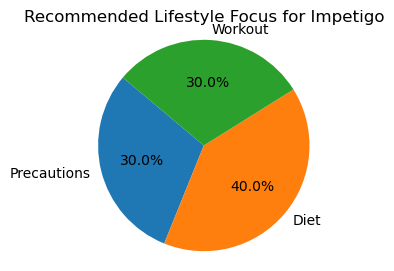

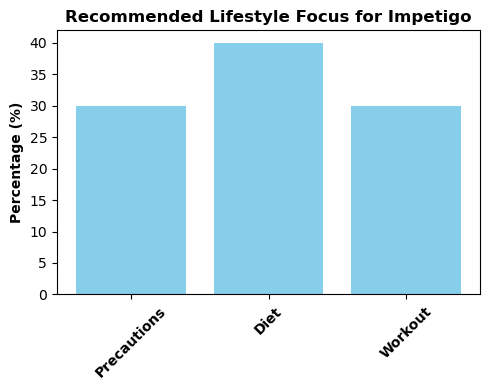

In [10]:
labels = ["Precautions", "Diet", "Workout"]
sizes = [30, 40, 30]  # assumption

plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f"Recommended Lifestyle Focus for {final_disease}")
plt.axis('equal')
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------------------------------

import matplotlib.pyplot as plt

labels = ["Precautions", "Diet", "Workout"]
sizes = [30, 40, 30]  # same assumption data

plt.figure(figsize=(5,4))
plt.bar(labels, sizes, color="skyblue")

plt.title(f"Recommended Lifestyle Focus for {final_disease}", fontsize=12, fontweight="bold")
plt.ylabel("Percentage (%)", fontsize=10, fontweight="bold")

plt.xticks(rotation=45, fontweight="bold")
plt.tight_layout()
plt.show()
